In [1]:
# Install required packages

!pip install ultralytics -q

!pip install transformers -q

!pip install networkx -q

!pip install kaggle -q

!pip install kagglehub -q

!pip install pyyaml -q

!pip install pyvis -q

!pip install supervision -q

In [28]:
import sys
import os
sys.path.append(os.path.abspath('..'))

from src.utils import check_data_config

# This runs the check and returns the path
DATA_YAML = check_data_config()

Config found: /workspace/dl4cv-final-project/sku110k_fixed.yaml
--------------------
names:
  0: product
path: /workspace/dl4cv-final-project/data/datasets/thedatasith/sku110k-annotations/versions/14/SKU110K_fixed
test: images/test
train: images/train
val: images/val

--------------------


In [3]:
from src.tuning import run_hyperparameter_tuning

print(f"Launching YOLO Nano Hyperparameter Tuning...")

results = run_hyperparameter_tuning(
    model_type="YOLO",
    model_weight="yolo11n.pt",
    data_yaml=DATA_YAML,
    iterations=5,
    epochs=10,
    project_dir="../runs/yolov11n/tune",
    batch_size=16
)

WARNING ⚠️ user config directory '/root/.config/Ultralytics' is not writable, using '/tmp/Ultralytics'. Set YOLO_CONFIG_DIR to override.
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/tmp/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Launching YOLO Nano Hyperparameter Tuning...
Starting Tuning for YOLO (yolo11n.pt)...
   Target: 5 iterations of 10 epochs each.
Tuner: Initialized Tuner instance with 'tune_dir=/workspace/dl4cv-final-project/runs/tune/tune_YOLO_yolo11n'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/5 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'box': 0.2, 'cls': 0.5, 'hsv_h': 0.015, 'mosaic': 1.0, 'mixup': 0.0}
Ultralytics 8.3.235 🚀 Python-3.12.3 torch-2

In [18]:
import importlib
import src.visualization
importlib.reload(src.visualization)

from src.visualization import print_best_hyperparameters, show_tuning_plots, print_tuning_csv

# Path to the folder named "tune_YOLO_yolo11n" (contains yaml/pngs)
SUMMARY_DIR = "../runs/yolov11n/tune/tune_YOLO_yolo11n"

print_best_hyperparameters(SUMMARY_DIR)

BEST HYPERPARAMETERS
# 5/5 iterations complete ✅ (3175.53s)
# Results saved to /workspace/dl4cv-final-project/runs/tune/tune_YOLO_yolo11n
# Best fitness=0.53666 observed at iteration 3
# Best fitness metrics are {'metrics/precision(B)': 0.88435, 'metrics/recall(B)': 0.77996, 'metrics/mAP50(B)': 0.86344, 'metrics/mAP50-95(B)': 0.53666, 'val/box_loss': 0.03686, 'val/cls_loss': 0.57041, 'val/dfl_loss': 0.99693, 'fitness': 0.53666}
# Best fitness model is /workspace/dl4cv-final-project/runs/tune/train3
lr0: 0.00933
lrf: 0.01
momentum: 0.83585
weight_decay: 0.00048
box: 0.2
cls: 0.44933
hsv_h: 0.01533
mosaic: 1.0
mixup: 0.0



Global Tuning Plots:
--- tune_fitness.png ---


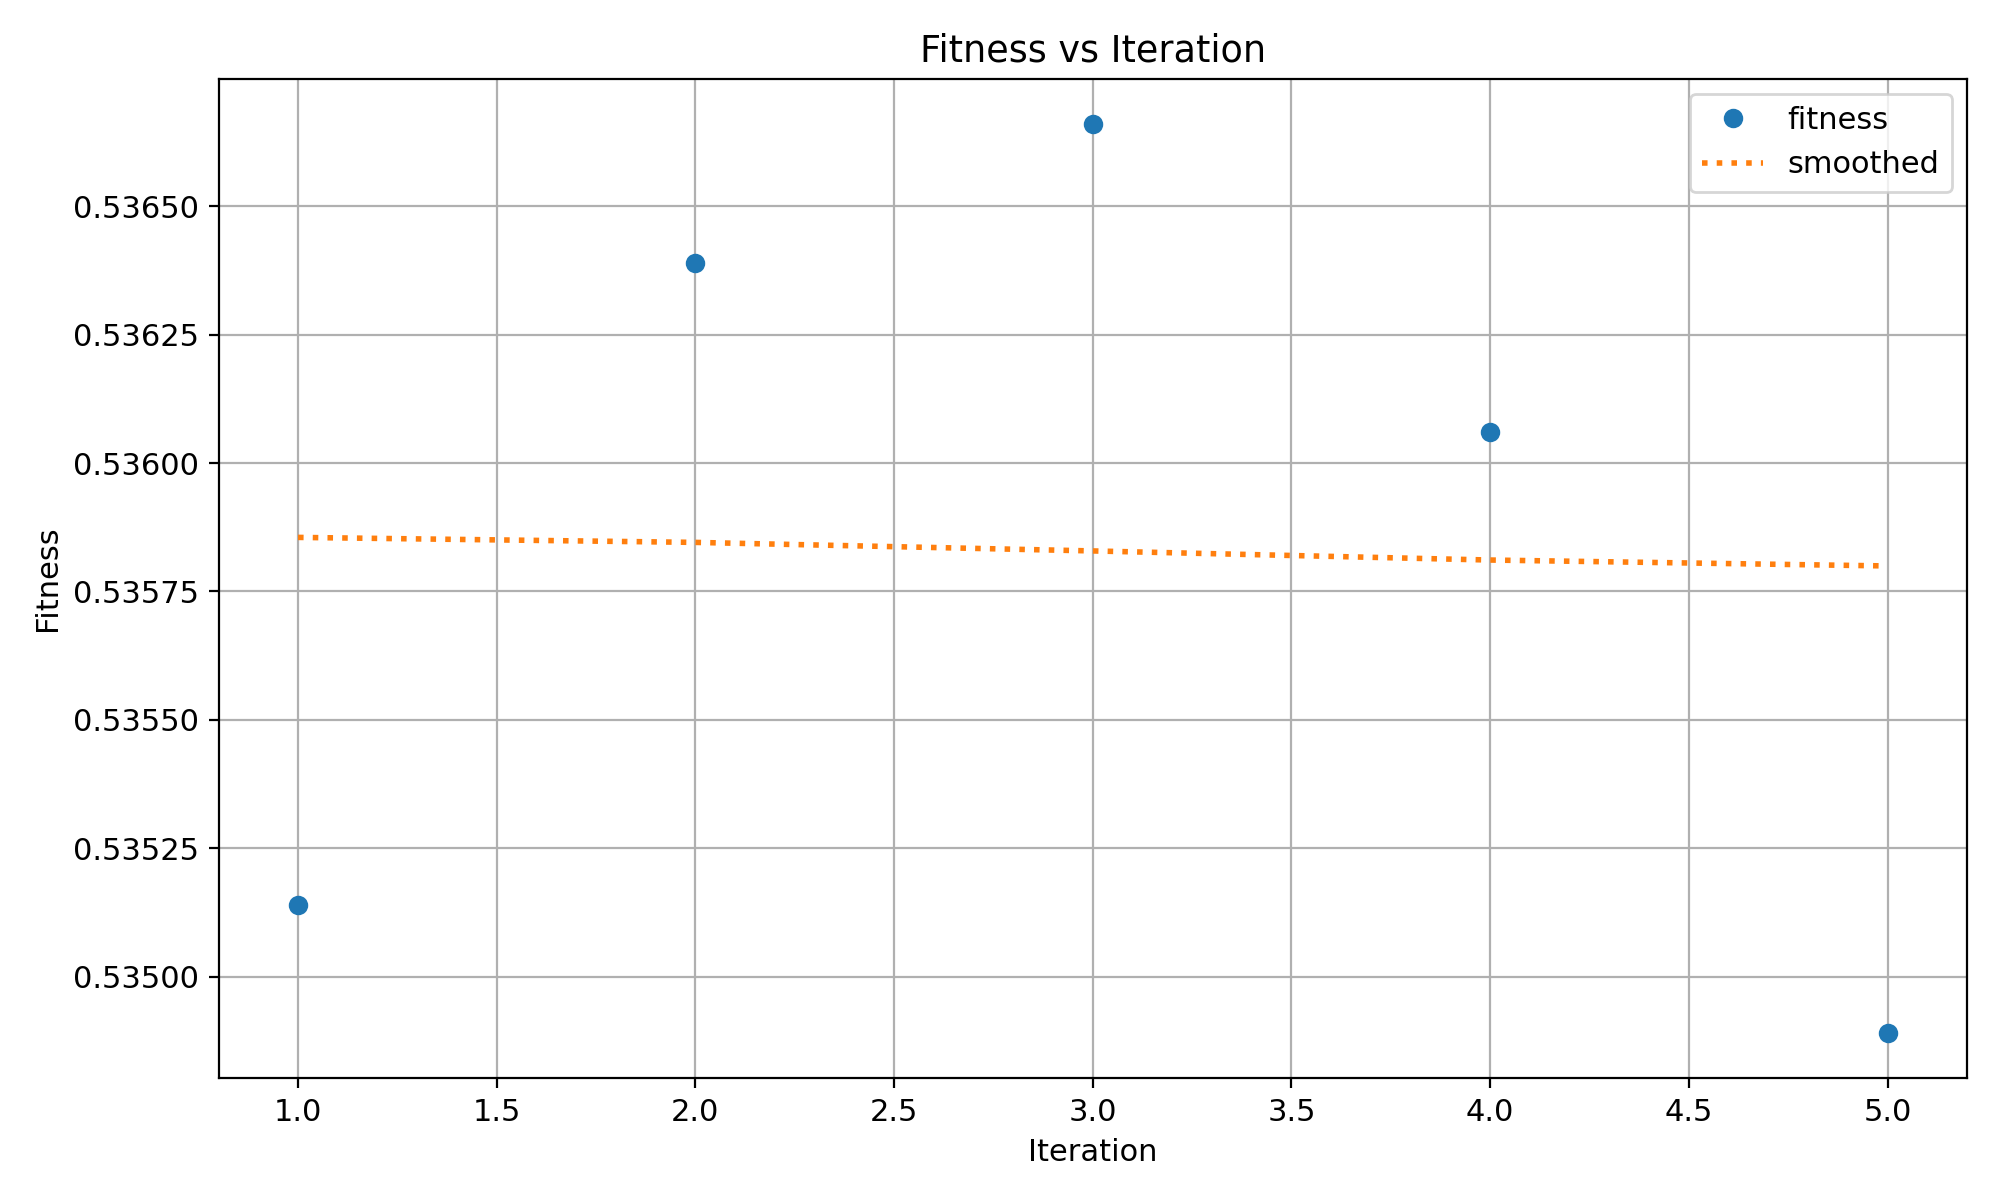

--- tune_scatter_plots.png ---


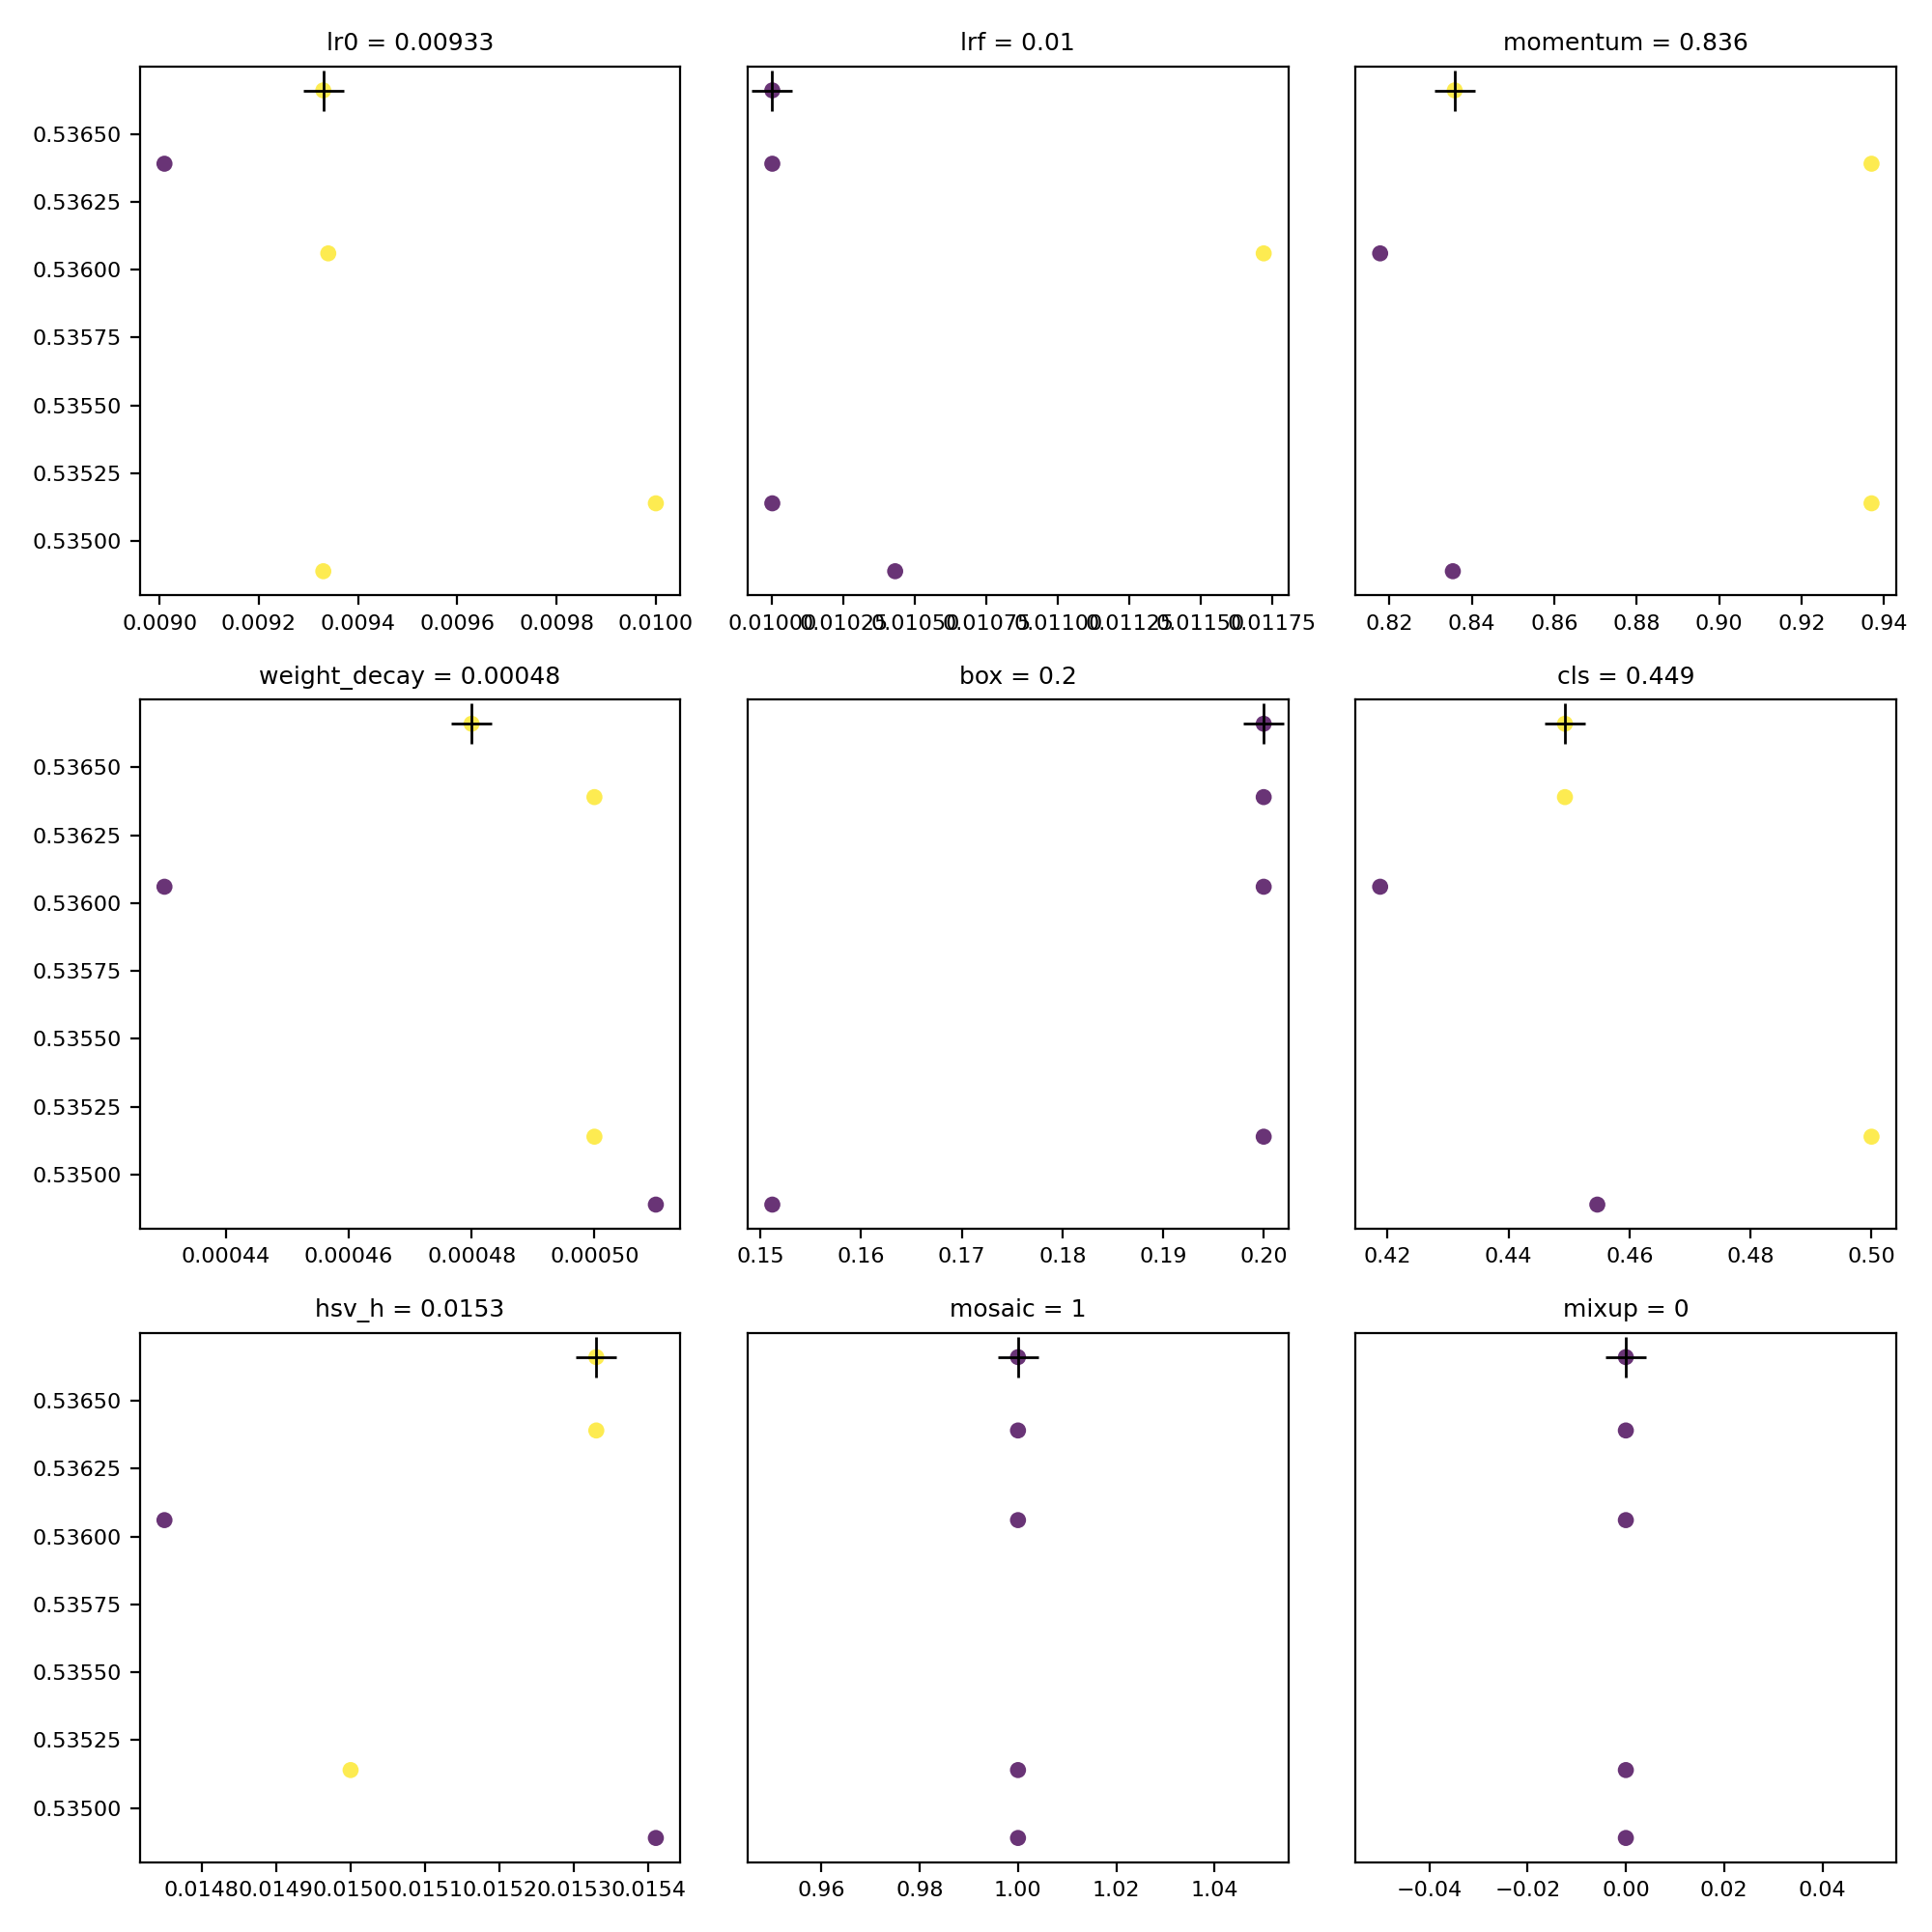

In [19]:
show_tuning_plots(SUMMARY_DIR)

In [20]:
print_tuning_csv(SUMMARY_DIR)


Tuning Results CSV (Top 5 runs):


,fitness,lr0,lrf,momentum,weight_decay,box,cls,hsv_h,mosaic,mixup
0,0.53514,0.01000,0.01000,0.93700,0.00050,0.20000,0.50000,0.01500,1.0,0.0
1,0.53639,0.00901,0.01000,0.93700,0.00050,0.20000,0.44933,0.01533,1.0,0.0
2,0.53666,0.00933,0.01000,0.83585,0.00048,0.20000,0.44933,0.01533,1.0,0.0
3,0.53606,0.00934,0.01172,0.81775,0.00043,0.20000,0.41879,0.01475,1.0,0.0
4,0.53489,0.00933,0.01043,0.83539,0.00051,0.15118,0.45468,0.01541,1.0,0.0



Scanning for training runs in: ../runs/yolov11n/tune


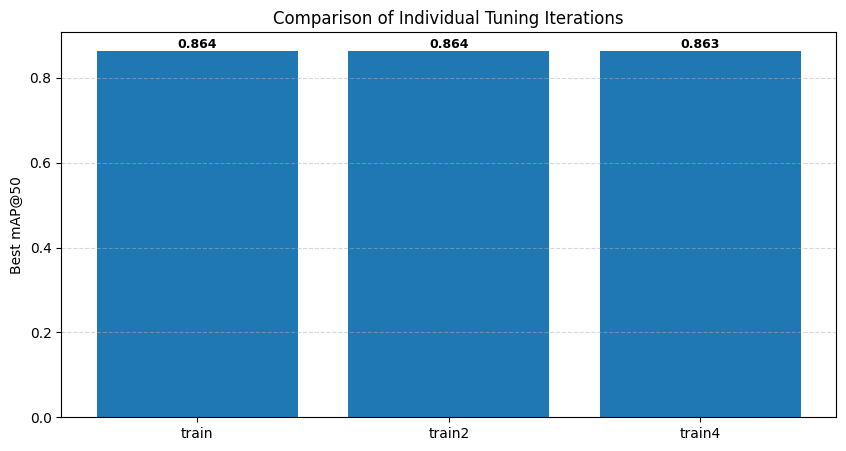

In [22]:
%matplotlib inline

from src.visualization import compare_tuning_runs

# Path to the PARENT folder (contains train, train2, train3)
ROOT_DIR = "../runs/yolov11n/tune"

compare_tuning_runs(ROOT_DIR)

In [24]:
print("\nRunning Final Evaluation on Test Set...")

from ultralytics import YOLO

model = YOLO("../runs/yolov11n/tune/tune_YOLO_yolo11n/weights/best.pt") 

# Run Validation on the TEST split
# We force split='test' so it uses the 'test' folder defined in your yaml
test_metrics = model.val(data=DATA_YAML, split='test')

# Extract & Print Key Metrics
# Ultralytics stores these in the .box attribute or results_dict
print("\n" + "="*30)
print("FINAL TEST SET RESULTS")
print("="*30)
print(f"Precision:   {test_metrics.results_dict['metrics/precision(B)']:.4f}")
print(f"Recall:      {test_metrics.results_dict['metrics/recall(B)']:.4f}")
print(f"mAP@50:      {test_metrics.results_dict['metrics/mAP50(B)']:.4f}")
print(f"mAP@50-95:   {test_metrics.results_dict['metrics/mAP50-95(B)']:.4f}")
print("="*30)


Running Final Evaluation on Test Set...
Ultralytics 8.3.235 🚀 Python-3.12.3 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 5090, 32110MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4583.0±2789.3 MB/s, size: 1005.9 KB)
val: Scanning /workspace/dl4cv-final-project/data/datasets/thedatasith/sku110k-annotations/versions/14/SKU110K_fixed/labels/test... 2920 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2920/2920 499.1it/s 5.9s
val: New cache created: /workspace/dl4cv-final-project/data/datasets/thedatasith/sku110k-annotations/versions/14/SKU110K_fixed/labels/test.cache
WARNING ⚠️ NMS time limit 2.800s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 183/183 4.2it/s 43.7s
                   all       2920     429411      0.885      0.794      0.879      0.546
Speed: 0.6ms preprocess, 5.2ms inference, 0.0ms loss, 2.5ms postprocess 